<a href="https://colab.research.google.com/github/Ashakorakooti/Asha/blob/main/Website_Traffic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhanupratapbiswas/website-traffic-analysis")

print("Path to dataset files:", path)


100%|██████████| 5.16M/5.16M [00:00<00:00, 7.35MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bhanupratapbiswas/website-traffic-analysis/versions/1


In [2]:
import os

# List all files in the downloaded dataset directory
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


/root/.cache/kagglehub/datasets/bhanupratapbiswas/website-traffic-analysis/versions/1/traffic.csv


In [4]:
import os

# Show all files in the dataset path
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


/root/.cache/kagglehub/datasets/bhanupratapbiswas/website-traffic-analysis/versions/1/traffic.csv


In [6]:
import pandas as pd

# Replace with the correct file name from the previous step
file_path = os.path.join(path, "traffic.csv")

# Load the dataset
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Preview the first few rows
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores MÃ¡s,No Llores MÃ¡s,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,MalÃ©,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [7]:
# Check column names
print(df.columns.tolist())

# Check data types
df.info()


['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc', 'linkid']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
# Replace with the correct file name from the previous step
file_path = os.path.join(path, "traffic.csv")

# Load the dataset
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Clean column names
df.columns = df.columns.str.strip()

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop any rows with invalid dates
df.dropna(subset=['date'], inplace=True)

# Extract time features
df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()

# Preview cleaned data
df.head()


,event,date,country,city,artist,album,track,isrc,linkid,day,month
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday,August
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday,August
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,Saturday,August
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores MÃ¡s,No Llores MÃ¡s,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,Saturday,August
4,click,2021-08-21,Maldives,MalÃ©,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday,August


/tmp/ipython-input-10-2580131349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_clicks.values, y=country_clicks.index, palette='viridis')


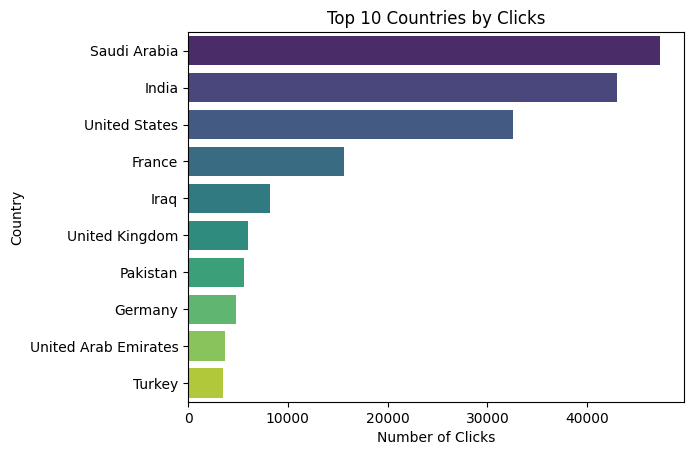

In [10]:
country_clicks = df['country'].value_counts().head(10)

sns.barplot(x=country_clicks.values, y=country_clicks.index, palette='viridis')
plt.title("Top 10 Countries by Clicks")
plt.xlabel("Number of Clicks")
plt.ylabel("Country")
plt.show()


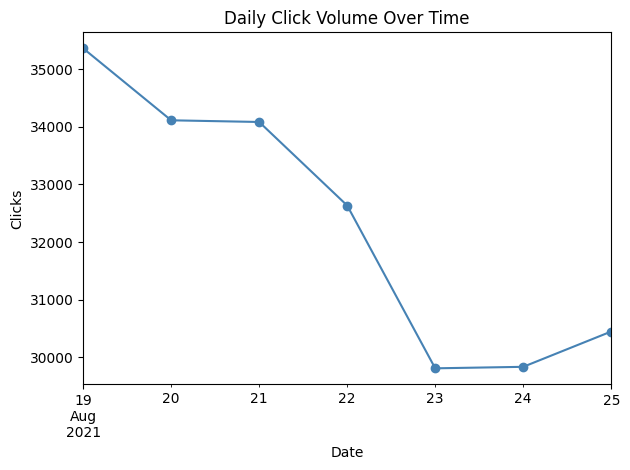

In [11]:
df.groupby('date').size().plot(kind='line', marker='o', color='steelblue')
plt.title("Daily Click Volume Over Time")
plt.ylabel("Clicks")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-1685680209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='magma')


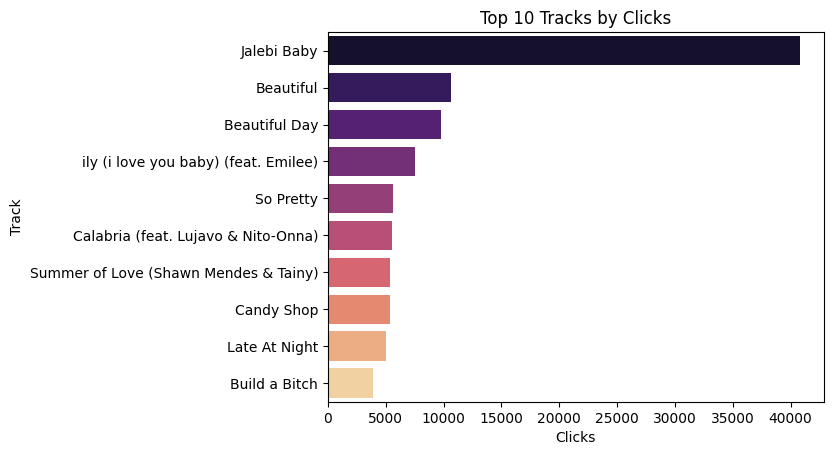

In [12]:
top_tracks = df['track'].value_counts().head(10)

sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='magma')
plt.title("Top 10 Tracks by Clicks")
plt.xlabel("Clicks")
plt.ylabel("Track")
plt.show()


/tmp/ipython-input-13-434111980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='coolwarm')


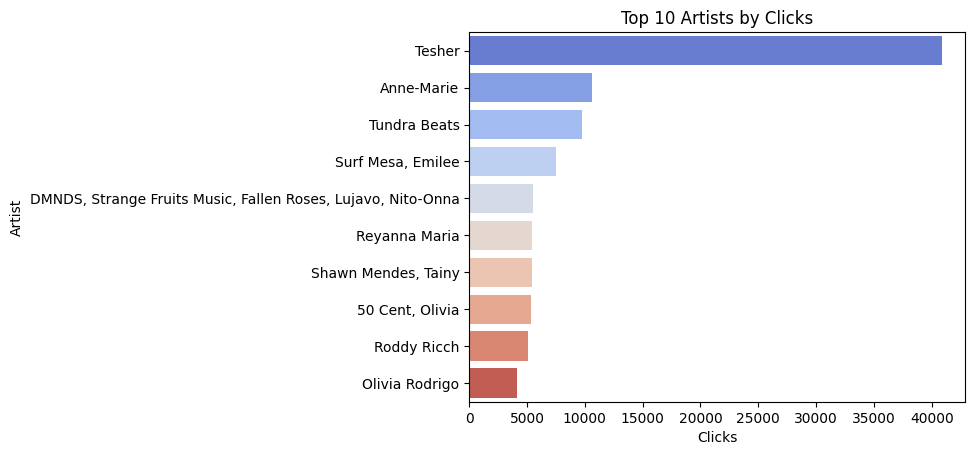

In [13]:
top_artists = df['artist'].value_counts().head(10)

sns.barplot(x=top_artists.values, y=top_artists.index, palette='coolwarm')
plt.title("Top 10 Artists by Clicks")
plt.xlabel("Clicks")
plt.ylabel("Artist")
plt.show()


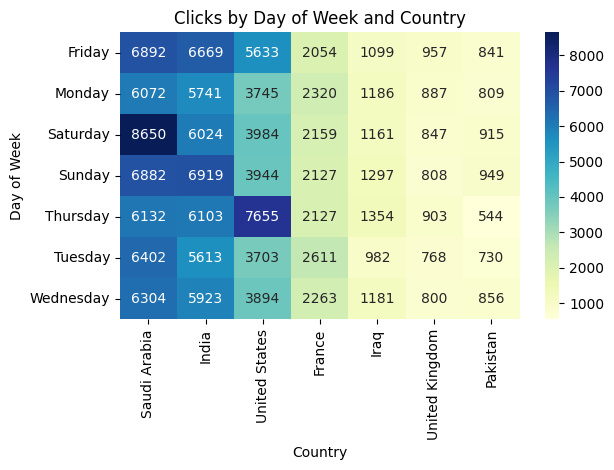

In [14]:
pivot = pd.crosstab(df['day'], df['country'])
pivot = pivot[sorted(pivot.columns, key=lambda x: pivot[x].sum(), reverse=True)[:7]]  # Top 7 countries

sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Clicks by Day of Week and Country")
plt.xlabel("Country")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


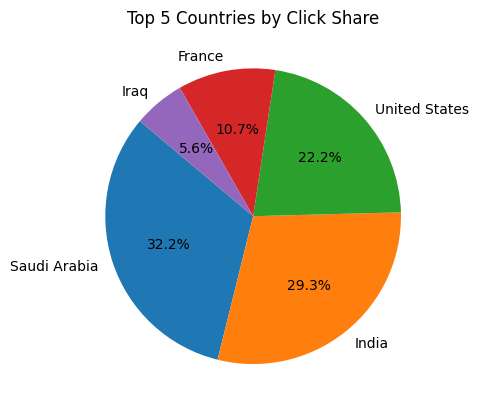

In [15]:
df['country'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Countries by Click Share")
plt.ylabel("")
plt.show()


/tmp/ipython-input-18-2655797804.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


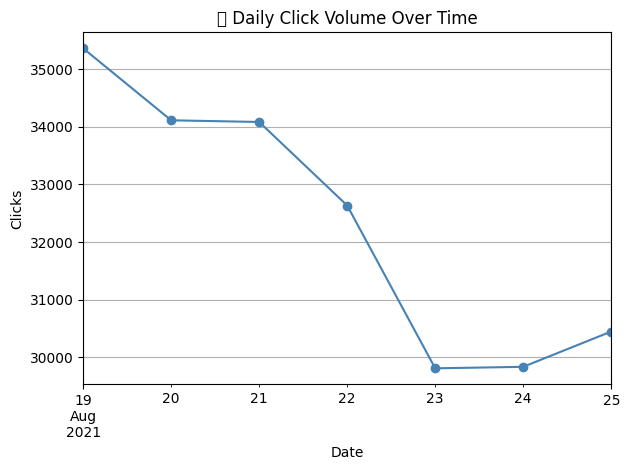

In [18]:
# Group clicks by date
daily_clicks = df.groupby('date').size()

# Plot
daily_clicks.plot(kind='line', marker='o', color='steelblue')
plt.title("📈 Daily Click Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Clicks")
plt.grid(True)
plt.tight_layout()
plt.show()


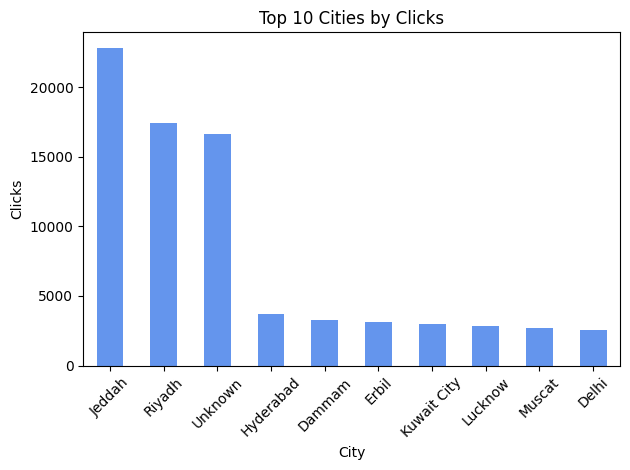

In [19]:
df['city'].value_counts().head(10).plot(kind='bar', color='cornflowerblue')
plt.title("Top 10 Cities by Clicks")
plt.xlabel("City")
plt.ylabel("Clicks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
total_clicks = len(df)
unique_tracks = df['track'].nunique()
unique_artists = df['artist'].nunique()
top_country = df['country'].value_counts().idxmax()

print("📊 Website Traffic Summary:")
print(f"• Total Clicks: {total_clicks}")
print(f"• Unique Tracks: {unique_tracks}")
print(f"• Unique Artists: {unique_artists}")
print(f"• Top Country: {top_country}")


📊 Website Traffic Summary:
• Total Clicks: 226278
• Unique Tracks: 3562
• Unique Artists: 2419
• Top Country: Saudi Arabia
